In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



In [3]:
WorldCupMatches = pd.read_excel('football_world_cups_results.xlsx')
WorldCuptableauformat = pd.read_excel('football_world_cups_results.xlsx', sheet_name='World Cup - Tableau format')
WorldcupSummary = pd.read_excel('football_world_cups_results.xlsx', sheet_name='WorldCups')



---



---
# Preprocessing


---



---




In [4]:
# Preprocessing on WorldCupMatches

WorldCupMatches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         852 non-null    int64         
 1   Date         852 non-null    datetime64[ns]
 2   Time         852 non-null    object        
 3   Round        852 non-null    object        
 4   Stadium      852 non-null    object        
 5   City         852 non-null    object        
 6   Country      852 non-null    object        
 7   HomeTeam     852 non-null    object        
 8   HomeGoals    852 non-null    int64         
 9   AwayGoals    852 non-null    int64         
 10  AwayTeam     852 non-null    object        
 11  Observation  852 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 80.0+ KB


In [5]:
WorldCupMatches.isnull().sum()


Year           0
Date           0
Time           0
Round          0
Stadium        0
City           0
Country        0
HomeTeam       0
HomeGoals      0
AwayGoals      0
AwayTeam       0
Observation    0
dtype: int64

In [6]:
# Preprocessing for WorldCuptableauformat

WorldCuptableauformat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         1704 non-null   int64         
 1   Game #       1704 non-null   int64         
 2   Date         1704 non-null   datetime64[ns]
 3   Time         1704 non-null   object        
 4   Round        1704 non-null   object        
 5   Stadium      1704 non-null   object        
 6   City         1704 non-null   object        
 7   Country      1704 non-null   object        
 8   Team         1704 non-null   object        
 9   Team G       1704 non-null   int64         
 10  Opponent     1704 non-null   object        
 11  Opponent G   1704 non-null   int64         
 12  Observation  1704 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 173.2+ KB


In [7]:

WorldCuptableauformat.isnull().sum()

Year           0
Game #         0
Date           0
Time           0
Round          0
Stadium        0
City           0
Country        0
Team           0
Team G         0
Opponent       0
Opponent G     0
Observation    0
dtype: int64

In [8]:
#preprocessing for WorldcupSummary
print(WorldcupSummary.info())

WorldcupSummary['Attendance'] = WorldcupSummary['Attendance'].astype(str).str.replace('.', '')
WorldcupSummary['Attendance'] = WorldcupSummary['Attendance'].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB
None


---



---


# Exploratory Data Analysis on FIFA World Cup Datasets (1930–2014)

---



---



In [9]:
WorldCupMatches.head()

,Year,Date,Time,Round,Stadium,City,Country,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
0,1930,1930-07-13,15:00,Group 1,Pocitos,Montevideo,Uruguay,France,4,1,Mexico,
1,1930,1930-07-13,15:00,Group 4,Parque Central,Montevideo,Uruguay,USA,3,0,Belgium,
2,1930,1930-07-14,12:45,Group 2,Parque Central,Montevideo,Uruguay,Yugoslavia,2,1,Brazil,
3,1930,1930-07-14,14:50,Group 3,Pocitos,Montevideo,Uruguay,Romania,3,1,Peru,
4,1930,1930-07-15,16:00,Group 1,Parque Central,Montevideo,Uruguay,Argentina,1,0,France,


---
## **Univariate level Hypothesis**
---



#### **Distribution Of Attendance in Left Skewed Because the attendance in football matches increased due to increase in qualified teams, matches and expansion of tournament.**

C:\Users\User\AppData\Local\Temp\ipykernel_9992\3309503031.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(WorldcupSummary['Attendance_log'], shade = True)


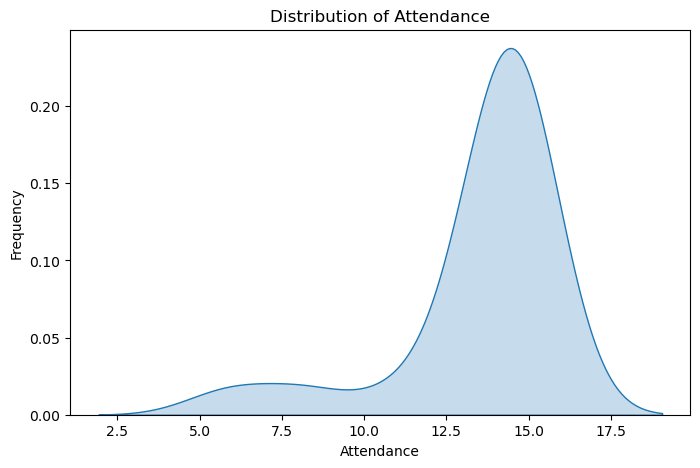

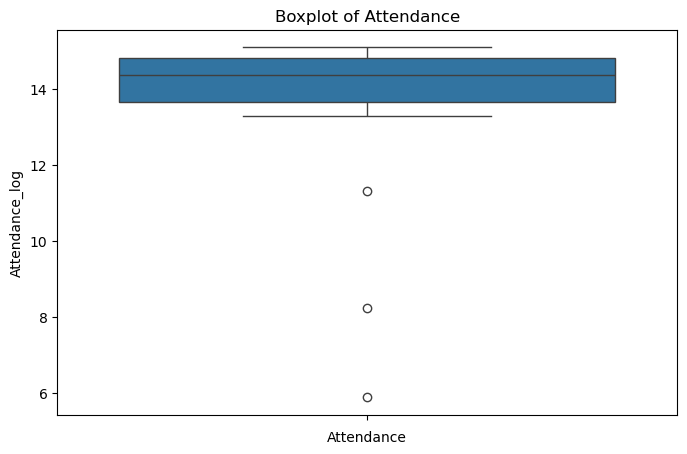

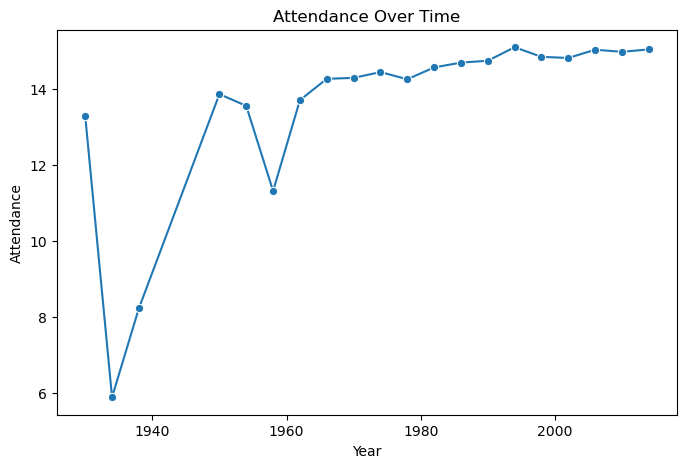

In [10]:
## Kde of Attendance

WorldcupSummary['Attendance_log'] = np.log(WorldcupSummary['Attendance'])

plt.figure(figsize = (8, 5))
sns.kdeplot(WorldcupSummary['Attendance_log'], shade = True)
plt.title('Distribution of Attendance')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize = (8, 5))
sns.boxplot(WorldcupSummary['Attendance_log'])
plt.title('Boxplot of Attendance')
plt.xlabel('Attendance')
plt.show()

plt.figure(figsize=(8, 5))
sns.lineplot(x=WorldcupSummary['Year'], y=WorldcupSummary['Attendance_log'], marker='o')
plt.title('Attendance Over Time')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.show()



#### **Distribution of goals scored in matches is right-skewed — most matches have low scores.**

In [11]:
# Feature Engineering
# Adding column Match Result

WorldCupMatches['MatchResult'] = np.where(WorldCupMatches['HomeGoals'] > WorldCupMatches['AwayGoals'], 'HomeWin',
                                          np.where(WorldCupMatches['HomeGoals'] < WorldCupMatches['AwayGoals'], 'AwayWin', 'Draw'))


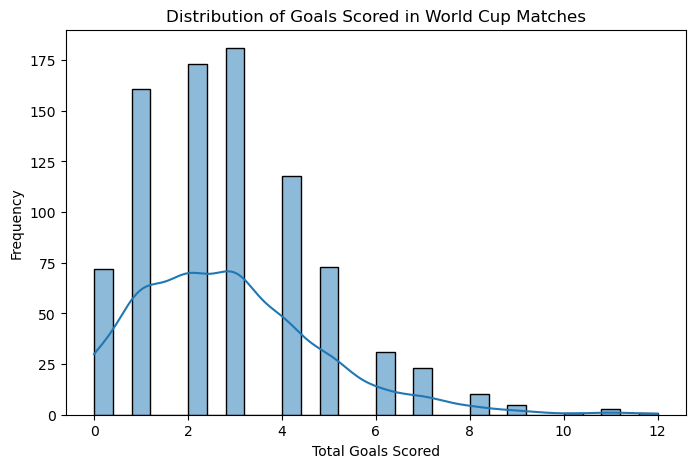

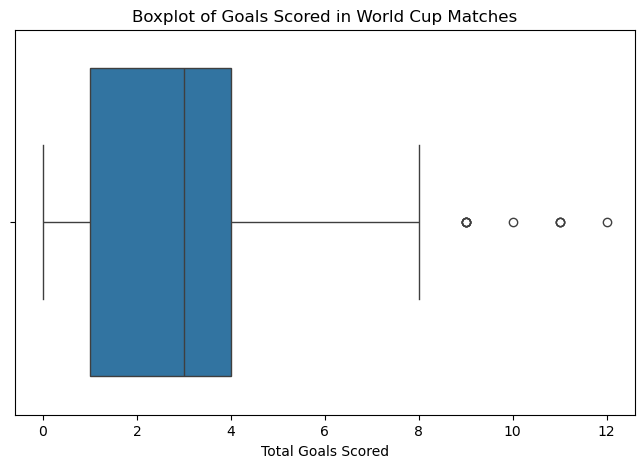

count    852.000000
mean       2.833333
std        1.954336
min        0.000000
25%        1.000000
50%        3.000000
75%        4.000000
max       12.000000
dtype: float64


In [12]:
# Histogram to visualize the distribution of goals scored in matches

plt.figure(figsize=(8,5))
sns.histplot(WorldCupMatches['HomeGoals'] + WorldCupMatches['AwayGoals'], bins=30, kde=True)
plt.title('Distribution of Goals Scored in World Cup Matches')
plt.xlabel('Total Goals Scored')
plt.ylabel('Frequency')
plt.show()

# boxplot to identify outliers in goals scored

plt.figure(figsize=(8,5))
sns.boxplot(x=WorldCupMatches['HomeGoals'] + WorldCupMatches['AwayGoals'])
plt.title('Boxplot of Goals Scored in World Cup Matches')
plt.xlabel('Total Goals Scored')
plt.show()

# Summary statistics for goals scored
goals_stats = (WorldCupMatches['HomeGoals'] + WorldCupMatches['AwayGoals']).describe()
print(goals_stats)


### **The number of matches played has increased over time (per World Cup)**

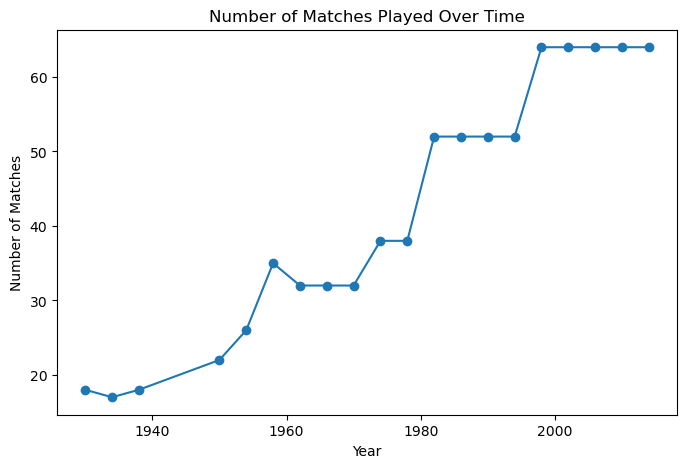

C:\Users\User\AppData\Local\Temp\ipykernel_9992\3727452465.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=WorldcupSummary['Year'], y=matches_per_year, palette='viridis')


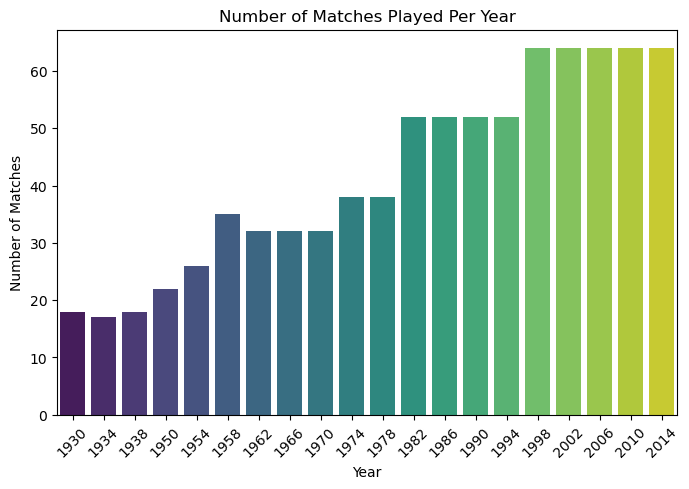

In [13]:
# Number of matches played over the years has increased over time

plt.figure(figsize=(8,5))
matches_per_year = WorldcupSummary['MatchesPlayed']
plt.plot(WorldcupSummary['Year'], matches_per_year, marker='o')
plt.title('Number of Matches Played Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()


#bar plot to show number of matches per year

plt.figure(figsize=(8,5))
sns.barplot(x=WorldcupSummary['Year'], y=matches_per_year, palette='viridis')
plt.title('Number of Matches Played Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()



---


## **Bivariate-Level Hypotheses**


---



### **Home teams tend to score more goals than away teams.**

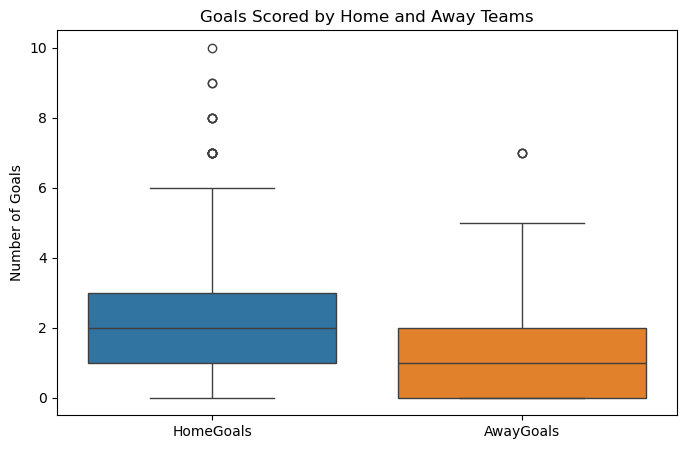

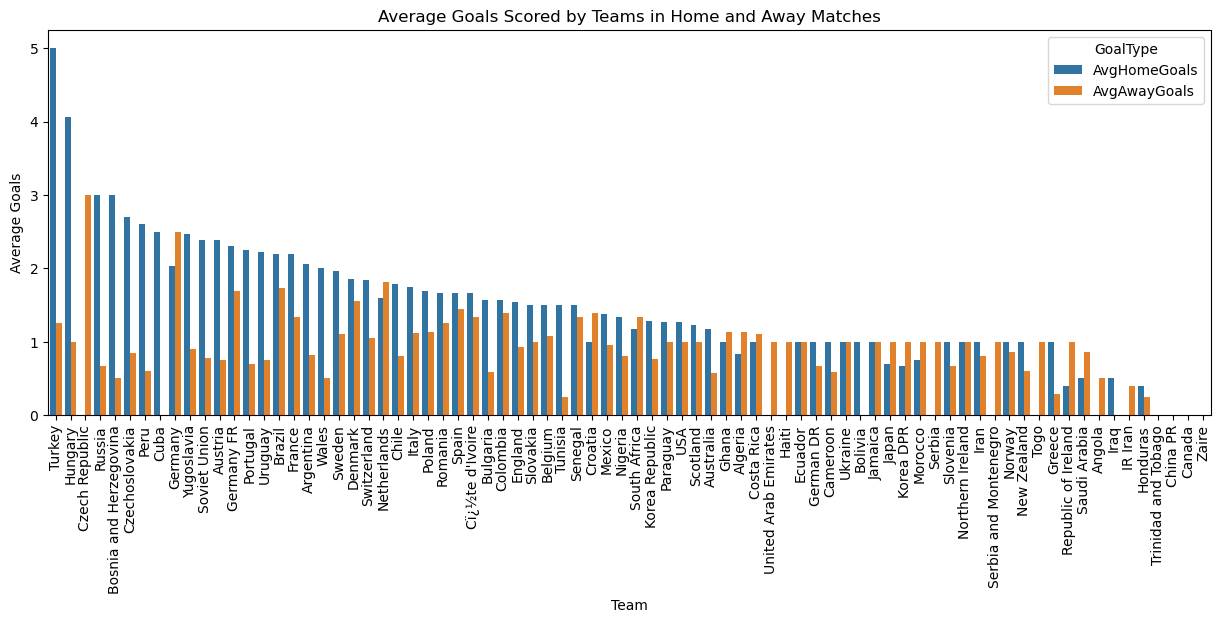

Home Goals Statistics:
 count    852.000000
mean       1.811033
std        1.610255
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: HomeGoals, dtype: float64

Away Goals Statistics:
 count    852.000000
mean       1.022300
std        1.087573
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: AwayGoals, dtype: float64


In [14]:
# Box plot

plt.figure(figsize=(8,5))
sns.boxplot(data=WorldCupMatches[['HomeGoals', 'AwayGoals']])
plt.title('Goals Scored by Home and Away Teams')
plt.ylabel('Number of Goals')
plt.show()

# Visaulization showing average goals scored by a team in home and away matches


avg_home_goals = WorldCupMatches.groupby('HomeTeam')['HomeGoals'].mean().reset_index()
avg_away_goals = WorldCupMatches.groupby('AwayTeam')['AwayGoals'].mean().reset_index()

avg_home_goals.columns = ['Team', 'AvgHomeGoals']
avg_away_goals.columns = ['Team', 'AvgAwayGoals']

avg_goals = pd.merge(avg_home_goals, avg_away_goals, on='Team')
avg_goals = pd.melt(avg_goals, id_vars='Team', value_vars=['AvgHomeGoals', 'AvgAwayGoals'], var_name='GoalType', value_name='AverageGoals')

avg_goals_sorted = avg_goals.sort_values('AverageGoals', ascending = False)


plt.figure(figsize=(15,5))
sns.barplot(x='Team', y='AverageGoals', hue='GoalType', data=avg_goals_sorted )
plt.title('Average Goals Scored by Teams in Home and Away Matches')
plt.xlabel('Team')
plt.ylabel('Average Goals')
plt.xticks(rotation=90)
plt.show()


# Summary statistics for home and away goals
home_goals_stats = WorldCupMatches['HomeGoals'].describe()
away_goals_stats = WorldCupMatches['AwayGoals'].describe()
print("Home Goals Statistics:\n", home_goals_stats)
print("\nAway Goals Statistics:\n", away_goals_stats)

### **Goals per match have decreased over time due to more tactical & defensive play.**

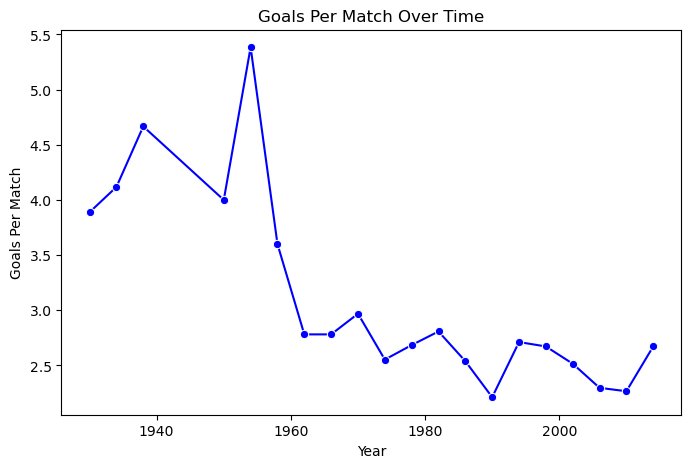

C:\Users\User\AppData\Local\Temp\ipykernel_9992\906072315.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=WorldcupSummary['Year'], y=WorldcupSummary['GoalPerMatch'], palette='viridis')


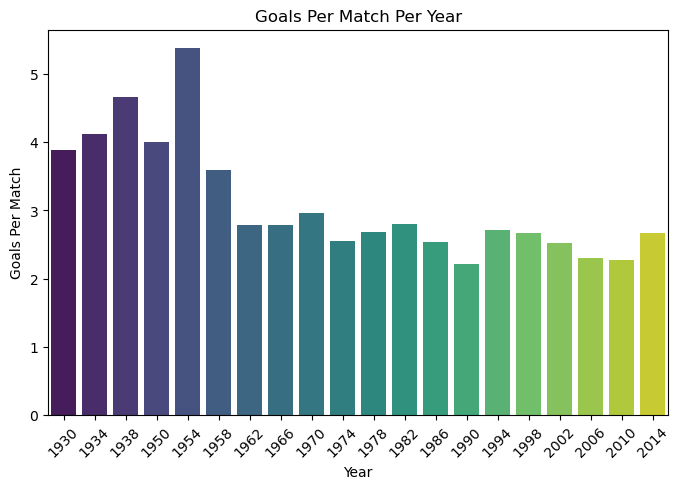

In [15]:
# plot showing goals per match decreasing with time

WorldcupSummary['GoalPerMatch'] = WorldcupSummary['GoalsScored'] / WorldcupSummary['MatchesPlayed']

plt.figure(figsize=(8,5))
sns.lineplot(x=WorldcupSummary['Year'], y=WorldcupSummary['GoalPerMatch'], marker='o', color='blue')
plt.title('Goals Per Match Over Time')
plt.xlabel('Year')
plt.ylabel('Goals Per Match')
plt.show()


plt.figure(figsize=(8,5))
sns.barplot(x=WorldcupSummary['Year'], y=WorldcupSummary['GoalPerMatch'], palette='viridis')
plt.title('Goals Per Match Per Year')
plt.xlabel('Year')
plt.ylabel('Goals Per Match')
plt.xticks(rotation=45)
plt.show()





---


## **Multivariate-Level Hypotheses**


---



### **Tournament year, goals scored, and attendance are interrelated — later tournaments have both higher attendance and more goals.**

<Figure size 800x500 with 0 Axes>

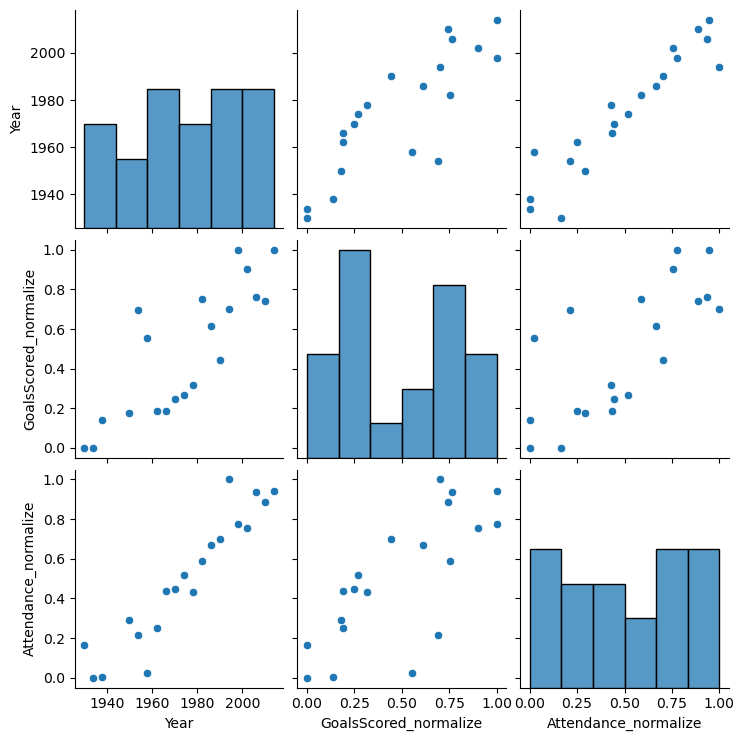

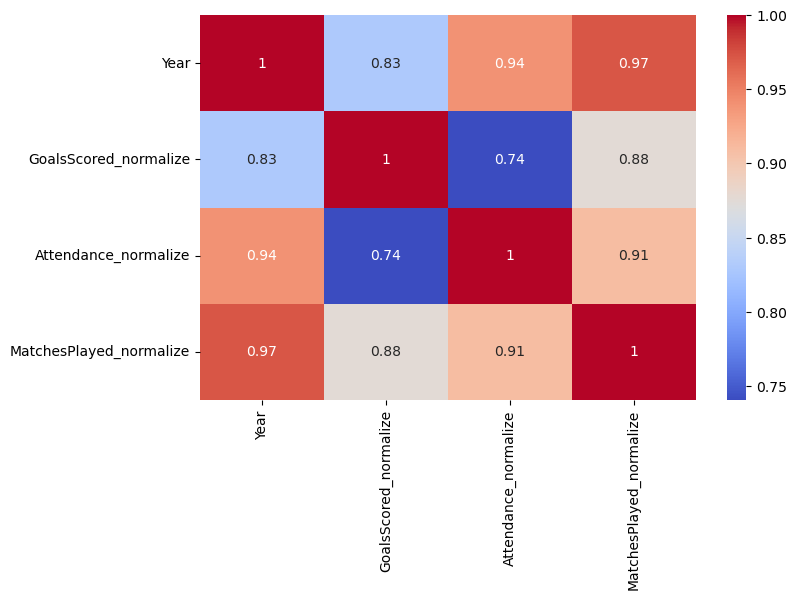

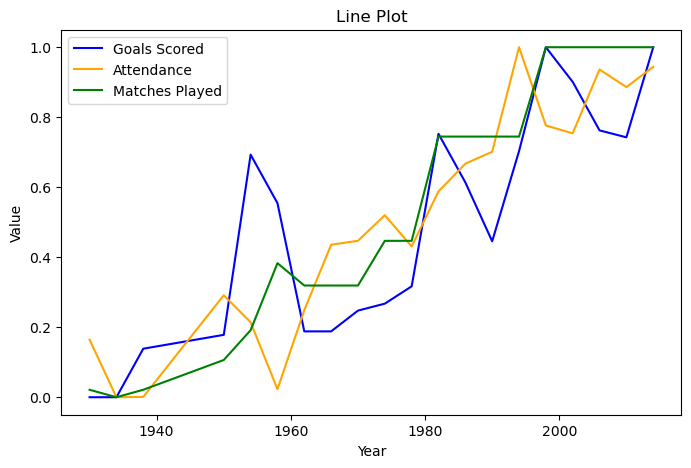

In [16]:
# Scatter plot matrix shwoing relationship between year, total, goals and attendance


#normalize goal scored and match played
scaler = MinMaxScaler()
WorldcupSummary[['Attendance_normalize', 'GoalsScored_normalize', 'MatchesPlayed_normalize']] = scaler.fit_transform(WorldcupSummary[['Attendance', 'GoalsScored', 'MatchesPlayed']])



plt.figure(figsize = (8, 5))
sns.pairplot(WorldcupSummary[['Year', 'GoalsScored_normalize', 'Attendance_normalize']])
plt.show()


plt.figure(figsize = (8, 5))
corr = WorldcupSummary[['Year', 'GoalsScored_normalize', 'Attendance_normalize', 'MatchesPlayed_normalize']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()


# Line Plot
plt.figure(figsize = (8, 5))
sns.lineplot(data = WorldcupSummary, x = 'Year', y = 'GoalsScored_normalize', color = 'Blue', label = "Goals Scored")
sns.lineplot(data = WorldcupSummary, x = 'Year', y = 'Attendance_normalize', color = 'Orange', label = "Attendance")
sns.lineplot(data = WorldcupSummary, x = 'Year', y = 'MatchesPlayed_normalize', color = 'Green', label = "Matches Played")
plt.title('Line Plot')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()



### Scatter Plot Matrix (SPLOM) — Using Year, HomeGoals, AwayGoals

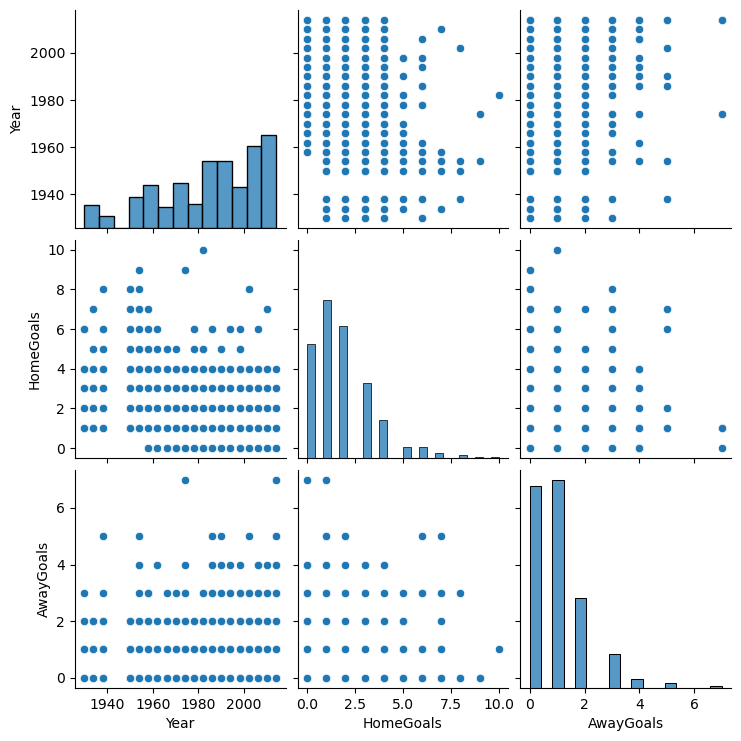

In [17]:
num_cols = ['Year', 'HomeGoals', 'AwayGoals']
sns.pairplot(WorldCupMatches[num_cols])
plt.show()

##The average total number of goals per match varies across different tournament rounds and World Cup years, reflecting differences in tactical styles, team strengths, and tournament formats over time.

C:\Users\User\AppData\Local\Temp\ipykernel_9992\3300515419.py:1: FutureWarning: The provided callable <function mean at 0x000001E16D35B6A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = WorldCupMatches.pivot_table(values=['HomeGoals','AwayGoals'],


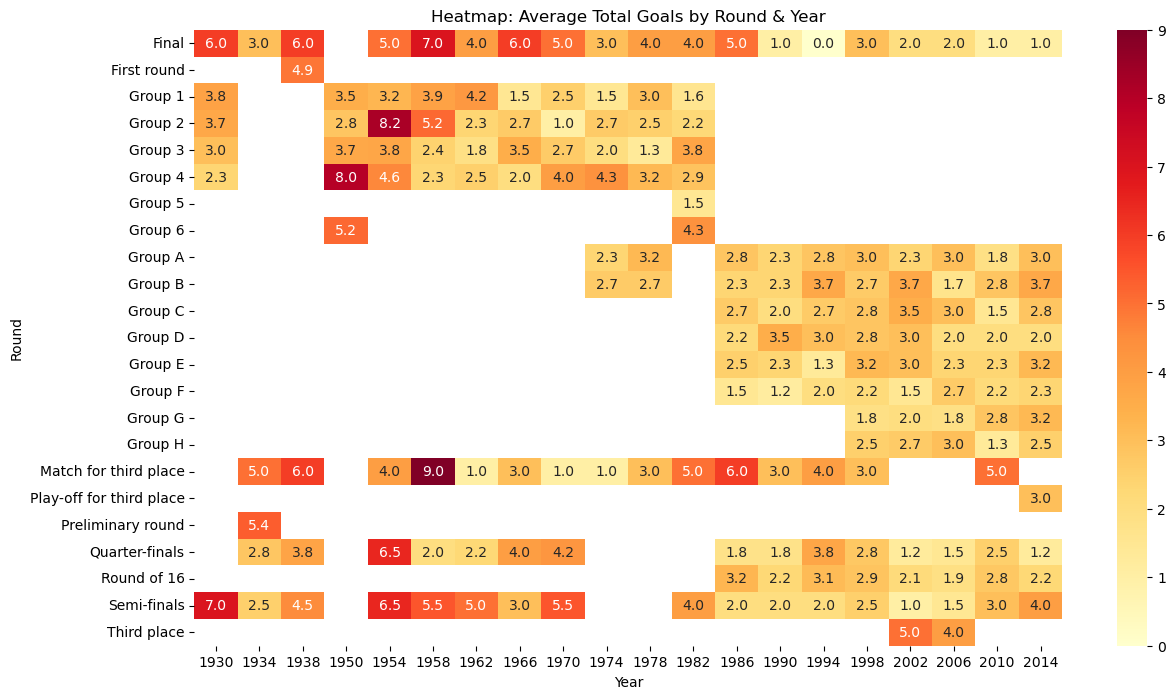

In [18]:
pivot_table = WorldCupMatches.pivot_table(values=['HomeGoals','AwayGoals'],
                             index='Round', columns='Year',
                             aggfunc=np.mean)

# Sum home+away goals to get total goals per match
total_goals = pivot_table['HomeGoals'] + pivot_table['AwayGoals']

plt.figure(figsize=(14,8))
sns.heatmap(total_goals, cmap='YlOrRd', annot=True, fmt=".1f")
plt.title('Heatmap: Average Total Goals by Round & Year')
plt.xlabel('Year')
plt.ylabel('Round')
plt.show()

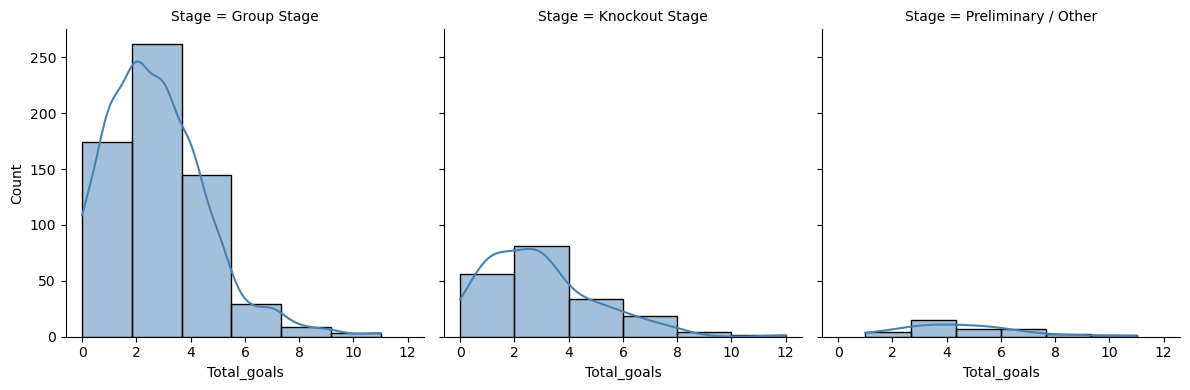

In [19]:
#average total goals in each round

WorldCupMatches['Total_goals'] = WorldCupMatches['HomeGoals'] + WorldCupMatches['AwayGoals']

def classify_stage(round_name):
    round_lower = str(round_name).lower()
    if 'group' in round_lower:
        return 'Group Stage'
    elif any(k in round_lower for k in ['quarter', 'semi', 'final', 'knockout', 'round of 16']):
        return 'Knockout Stage'
    else:
        return 'Preliminary / Other'

# Creating Stage column
WorldCupMatches['Stage'] = WorldCupMatches['Round'].apply(classify_stage)
avg_goals_by_stage = WorldCupMatches.groupby('Stage')['Total_goals'].mean()

# Trellis plot
g = sns.FacetGrid(WorldCupMatches, col='Stage', col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x='Total_goals', bins=6, kde=True, color='steelblue')




plt.tight_layout()
plt.show()